# Stroke Disease Classification


## Background
In this machine learning project, the overall topic that will be resolved is in the field of stroke health, where it will try to predict the possibility of a stroke in a person with certain conditions based on several factors including: age, certain diseases (hypertension, heart disease), smoking, etc.

## 1. Install and import required library

In [1]:

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 2. Prepares the dataset


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 3.2 Explore Dataset information

In [3]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# check dataset shape
df.shape

(5110, 12)

In [5]:
# check missing value of the data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# describe numeric column
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3.3 Data Visualization
#### 3.3.1 Check dataset target

<AxesSubplot:>

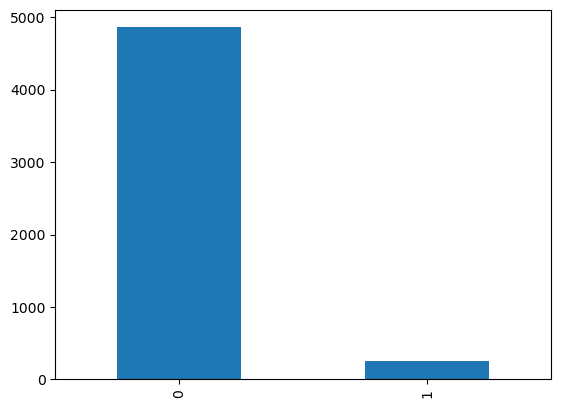

In [7]:
df['stroke'].value_counts().plot(kind='bar')

#### 3.3.2 Check datatype of the column

In [8]:
cats = list(df.select_dtypes(include=['object','bool']) )
nums = list(df.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [9]:
# classify data for the encoding
encoder = []
onehot = []

for col in cats:
   if len(df[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)

['ever_married', 'Residence_type']
['gender', 'work_type', 'smoking_status']


In [10]:
df_labencoded = df.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [11]:
# check feature correlation to the target
df_labencoded.corr().round(2)

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.68,0.01,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.16,-0.01,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.11,0.00,0.16,0.04,0.13
ever_married,0.01,0.68,0.16,0.11,1.00,0.01,0.16,0.34,0.11
Residence_type,-0.00,0.01,-0.01,0.00,0.01,1.00,-0.00,-0.00,0.02
avg_glucose_level,0.00,0.24,0.17,0.16,0.16,-0.00,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.34,-0.00,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.11,0.02,0.13,0.04,1.00


AxesSubplot(0.125,0.11;0.62x0.77)
AxesSubplot(0.125,0.11;0.62x0.77)
AxesSubplot(0.125,0.11;0.62x0.77)


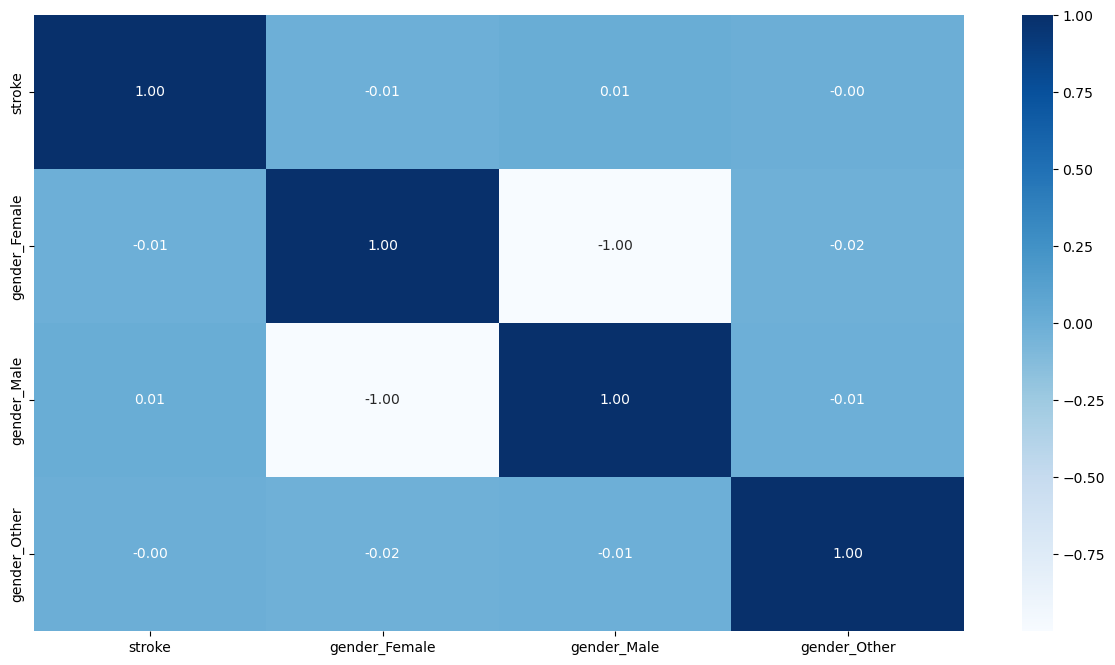

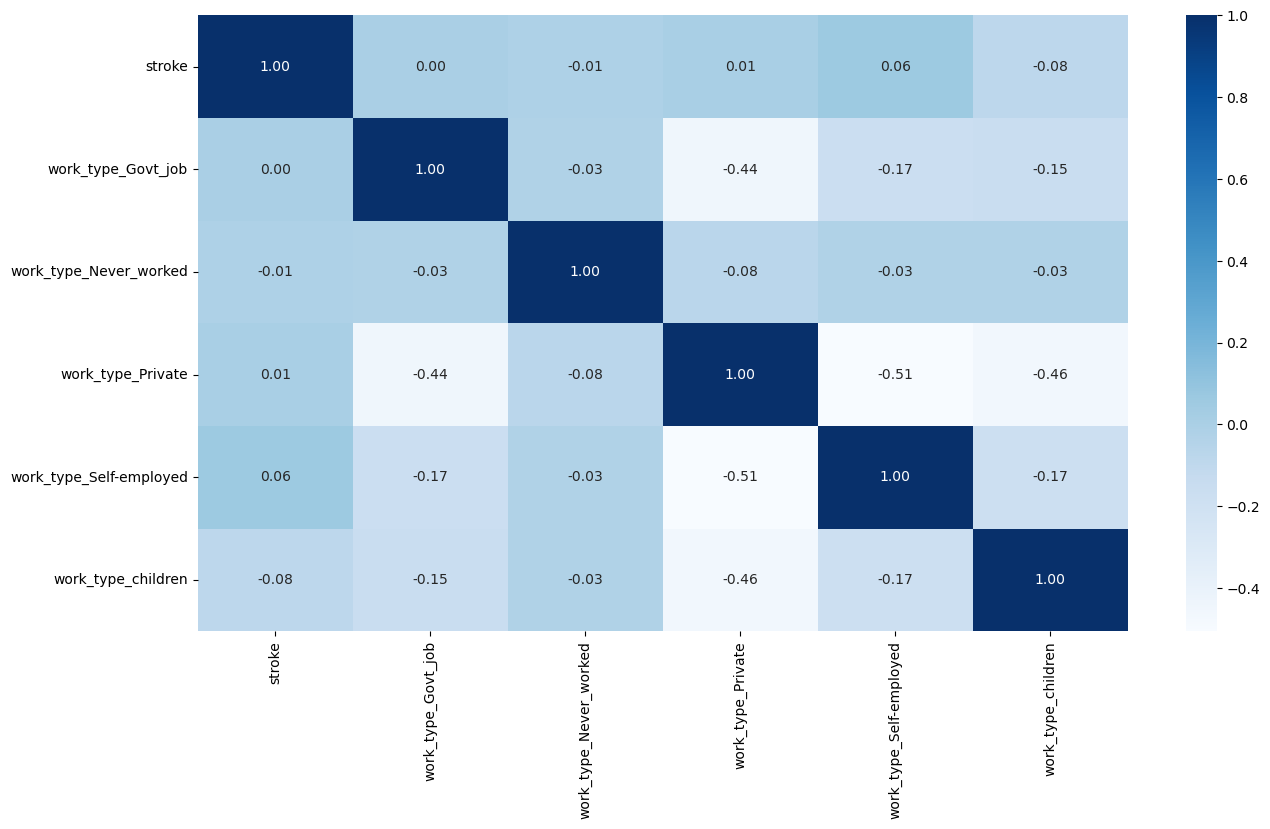

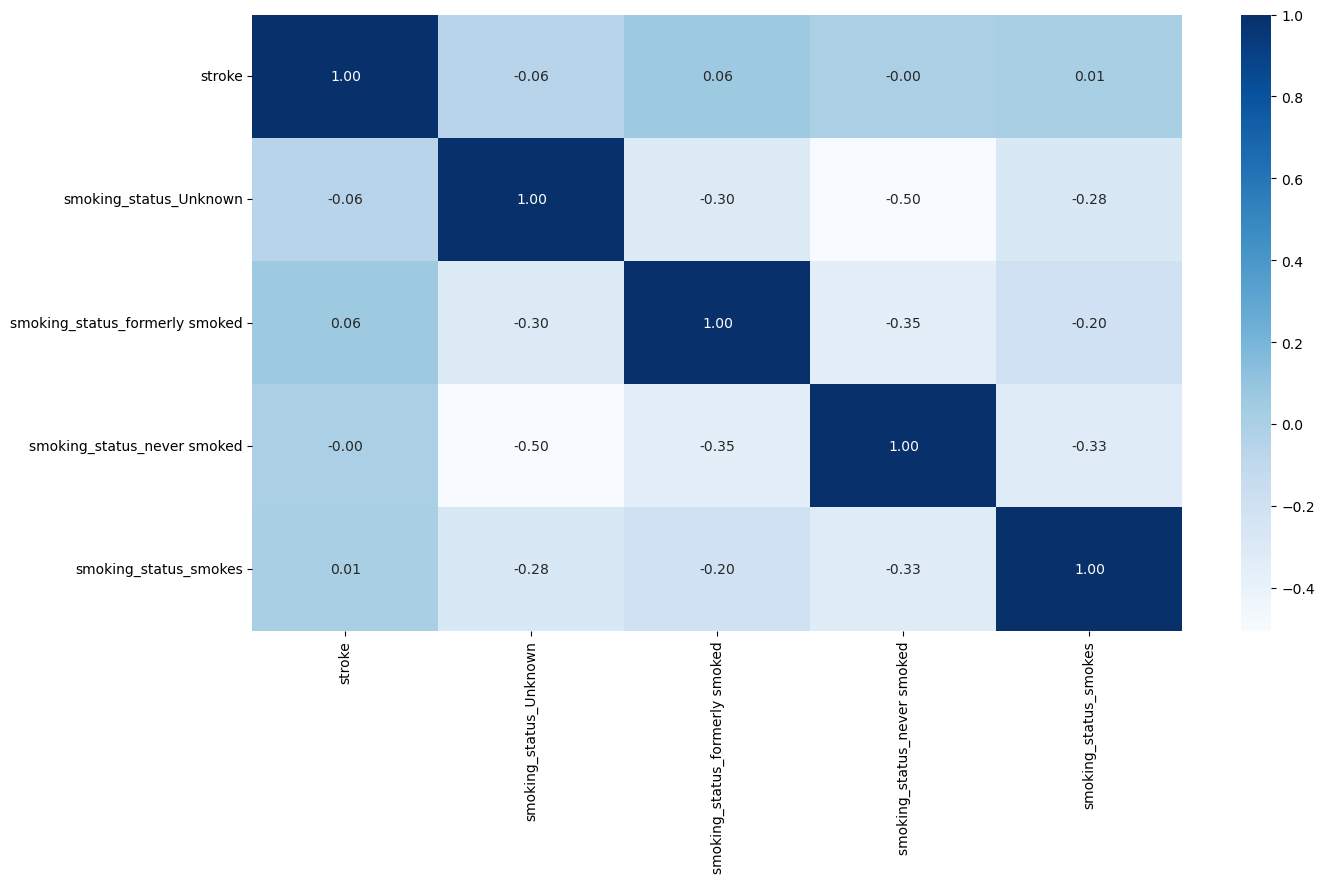

In [12]:
# visualize feature correlation to the target
for col in onehot:
    df_loop = df_labencoded[[col,'stroke']].copy()
    onehots = pd.get_dummies(df_loop[col], prefix=col)
    df_loop = df_loop.join(onehots)
    plt.figure(figsize=(15, 8))
    print(sns.heatmap(df_loop.corr(), cmap='Blues', annot=True, fmt='.2f'))

## 4. Data Preparation
### 4.1 Handling missing values with mean subtitution

In [13]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [14]:
# recheck missing value
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
# check duplicated data
duplicate = df.duplicated()
df[duplicate].sum()

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### 4.2 Remove unnecessary column

In [16]:
df = df.drop(['id'], axis=1)
nums.remove('id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### 4.3 Remove outliers of the dataset

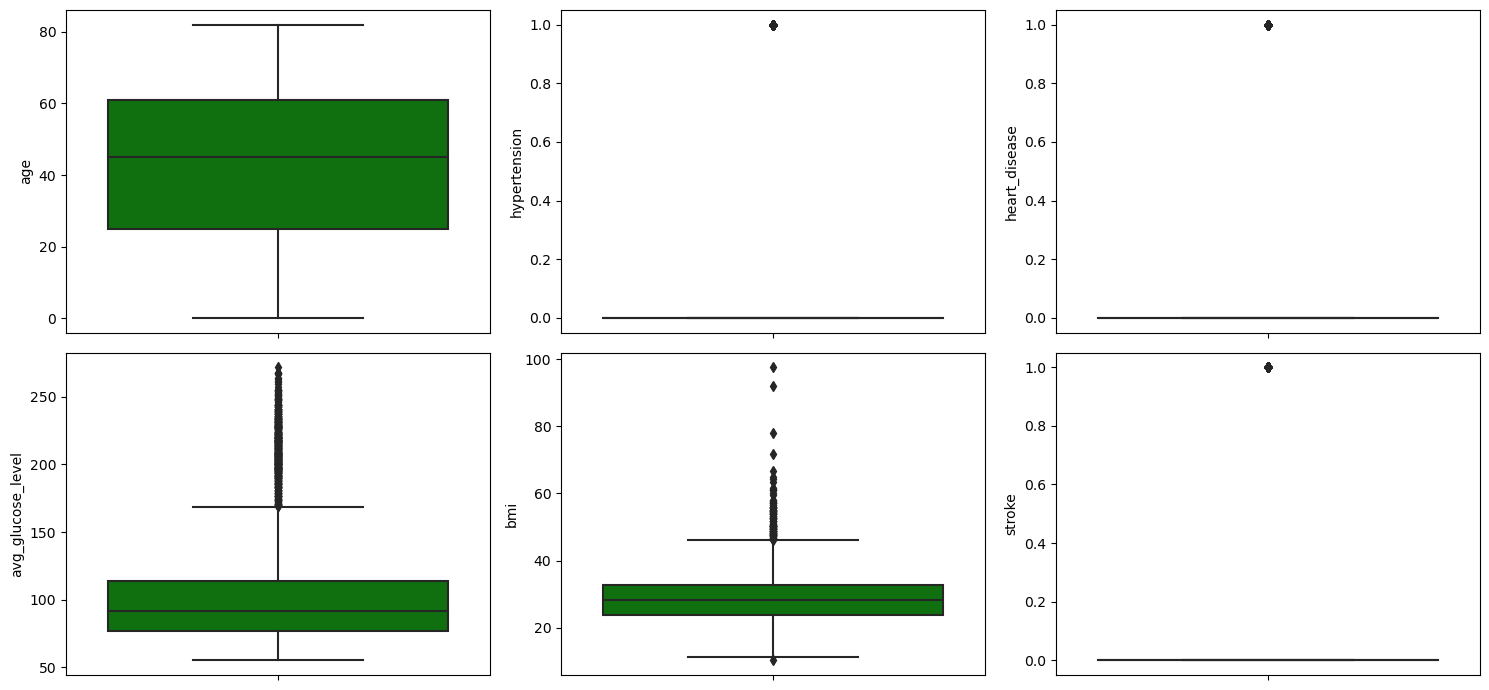

In [17]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [18]:
outlier = ['avg_glucose_level', 'bmi']

In [19]:
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### 4.4 Convert Categorical column to Numerical

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4391 non-null   object 
 1   age                4391 non-null   float64
 2   hypertension       4391 non-null   int64  
 3   heart_disease      4391 non-null   int64  
 4   ever_married       4391 non-null   object 
 5   work_type          4391 non-null   object 
 6   Residence_type     4391 non-null   object 
 7   avg_glucose_level  4391 non-null   float64
 8   bmi                4391 non-null   float64
 9   smoking_status     4391 non-null   object 
 10  stroke             4391 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 411.7+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
print("Unique 'gender': {}".format(df['gender'].unique()))
print("Unique 'ever_married': {}".format(df['ever_married'].unique()))
print("Unique 'work_type': {}".format(df['work_type'].unique()))
print("Unique 'Residence_type': {}".format(df['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(df['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']
Unique 'Residence_type': ['Rural' 'Urban']
Unique 'smoking_status': ['never smoked' 'Unknown' 'smokes' 'formerly smoked']


In [24]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [25]:
df['gender'] = label_gender.fit_transform(df['gender'])
df['ever_married'] = label_married.fit_transform(df['ever_married'])
df['work_type']= label_work.fit_transform(df['work_type'])
df['Residence_type']= label_residence.fit_transform(df['Residence_type'])
df['smoking_status']= label_smoking.fit_transform(df['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(df.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
2       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
6       1  74.0             1              1             1          2               0              70.09  27.400000               2       1
7       0  69.0             0              0             0          2               1              94.39  22.800000               2       1
8       0  59.0             0              0             1          2               0              76.15  28.893237               0       1
9       0  78.0             0              0             1          2               1              58.57  24.200000               0       1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4391 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4391 non-null   int32  
 1   age                4391 non-null   float64
 2   hypertension       4391 non-null   int64  
 3   heart_disease      4391 non-null   int64  
 4   ever_married       4391 non-null   int32  
 5   work_type          4391 non-null   int32  
 6   Residence_type     4391 non-null   int32  
 7   avg_glucose_level  4391 non-null   float64
 8   bmi                4391 non-null   float64
 9   smoking_status     4391 non-null   int32  
 10  stroke             4391 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 325.9 KB


In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


### 4.5 Pre Modeling Steps

In [28]:
# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']

### 4.7 Split train data and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3,
    random_state = 111)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3073, 10), (3073,), (1318, 10), (1318,))

### 4.8 Normalize data with StandardScaler

In [30]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## 5. Machine Learning Modeling

### 5.1 Using K-Nearest-Neighbors-Classifier

In [31]:
# Create simple model
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Test model with test data
y_pred = baseline_model.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing-set Accuracy score is: 0.9681335356600911
Training-set Accuracy score is: 0.9609502115196876


,precision,recall,f1-score,support
No Stroke,0.968869,0.999217,0.983809,1277.000000
Stroke,0.000000,0.000000,0.000000,41.000000
accuracy,0.968134,0.968134,0.968134,0.968134
macro avg,0.484434,0.499608,0.491904,1318.000000
weighted avg,0.938729,0.968134,0.953205,1318.000000


<AxesSubplot:>

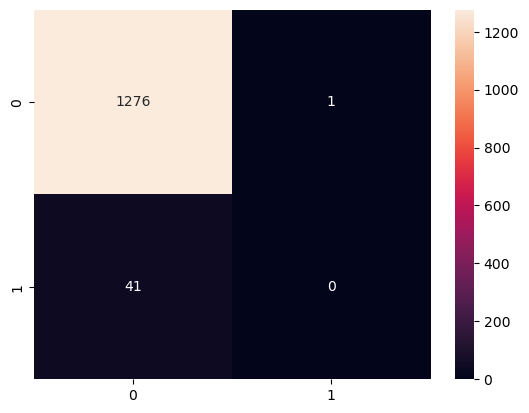

In [34]:
# Confussion matrix
baseline_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(baseline_cf, annot = True, fmt = "d")

### 5.2 Develop the Machine Learning model with Hyperparameter Tuning HalvingGridSearchCV

In [35]:
# set hyperparameter
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [36]:
# Seek for the best hyperparameter with HalvingGridSearchCV
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=3, random_state= 123, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='recall',
                                aggressive_elimination=False).fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [37]:
# Result of the hyperparameter tuning
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best Hyperparameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance') with score 0.06407278358497871


In [38]:
# Set the model with the best hyperparameter
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance')

In [39]:
# Test tuned model with test data
y_pred = model.predict(X_test)

In [40]:
# Tuned model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,model.predict(X_train)))

improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Testing-set Accuracy score is: 0.936267071320182
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.970055,0.963978,0.967007,1277.000000
Stroke,0.061224,0.073171,0.066667,41.000000
accuracy,0.936267,0.936267,0.936267,0.936267
macro avg,0.515640,0.518574,0.516837,1318.000000
weighted avg,0.941783,0.936267,0.939000,1318.000000


## 6. Model Evaluation
### 6.1 Matrix comparison between the initial baseline model and the hyperparameter-tuned model

In [41]:
metrics = pd.DataFrame({'accuracy' : [baseline_report['accuracy'], improvement_report['accuracy']],
                        'f1-score_0' : [baseline_report['No Stroke']['f1-score'],improvement_report['No Stroke']['f1-score']],
                        'precision_0' : [baseline_report['No Stroke']['precision'],improvement_report['No Stroke']['precision']],
                        'recall_0' : [baseline_report['No Stroke']['recall'],improvement_report['No Stroke']['recall']],
                        'f1-score_1' : [baseline_report['Stroke']['f1-score'],improvement_report['Stroke']['f1-score']],
                        'precision_1' : [baseline_report['Stroke']['precision'],improvement_report['Stroke']['precision']],
                        'recall_1' : [baseline_report['Stroke']['recall'],improvement_report['Stroke']['recall']]},
                        index=['Model Baseline','Tuned Model'])
multiheader = [('','accuracy'),
               ('No Stroke', 'f1-score'),
               ('No Stroke', 'precision'),
               ('No Stroke', 'recall'),
               ('Stroke', 'f1-score'),
               ('Stroke', 'precision'),
               ('Stroke', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
metrics

No Stroke                        Stroke            \
                accuracy  f1-score precision    recall  f1-score precision   
Model Baseline  0.968134  0.983809  0.968869  0.999217  0.000000  0.000000   
Tuned Model     0.936267  0.967007  0.970055  0.963978  0.066667  0.061224   

                          
                  recall  
Model Baseline  0.000000  
Tuned Model     0.073171

## Closing
Machine Learning Model to predict stroke in humans can be used because it reaches a recall score of 97.7% which is where this model can predict stroke very well although it still needs to be improved even up to a recall score of 100%.

In [42]:
model.score(X_test,y_test)

0.936267071320182

In [43]:
# Predicting the Test set results
y_pred = model.predict(X_test)

df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
3626,0,0
4162,0,0
3058,0,0
2227,0,0
2100,0,0
...,...,...
5069,0,0
1899,0,0
3392,0,0
869,0,1


In [45]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
6,1,74.0,1,1,1,2,0,70.09,27.400000,2
7,0,69.0,0,0,0,2,1,94.39,22.800000,2
8,0,59.0,0,0,1,2,0,76.15,28.893237,0
9,0,78.0,0,0,1,2,1,58.57,24.200000,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


# Saving The Model

In [44]:
import pickle
pickle.dump(model, open('stroke.pkl', 'wb'))